# Hyperedge bundling demonstration notebook

This notebook demonstrates the use of the hyperedge bundling methods described in the manuscript *Hyperedge bundling: A practical solution to spurious interactions in MEG/EEG source connectivity analyses*, Wang S. H. et al. 

It uses the functions defined and provided in edge_clustering.py. See the README for necessary python packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

The edge_clustering.py provides 4 functions.

In [2]:
from edge_clustering import compute_edge_similarity_matrix, cluster_edges_UPGMA 
from edge_clustering import cluster_edges_Louvain, sort_edges_by_cluster_size

The first step is to import the necessary data files.

The first file is the parcel infidelity matrix which quantifies the amount of mixing present in source-reconstructed data between each parcel pair.

In [3]:
parcel_infidelity_matrix = np.genfromtxt('parcel_infidelity_matrix.csv',delimiter=';')

The second file is a thresholded parcel-parcel adjacency matrix representing the to-be-bundled significant edges in the relevant parcel space.

In [4]:
matrix_file_name = 'IM_example_1.csv'
significant_edges_matrix = np.genfromtxt(matrix_file_name,delimiter=';')

The first step is to use these two matrices to compute the edge similarity matrix (see Section 2.6 of the manuscript) (this can take a while depending on the number of significant edges in the significant_edges_matrix.

In [5]:
out = compute_edge_similarity_matrix(parcel_infidelity_matrix, 
                                     significant_edges_matrix)

edge_similarity_matrix = out[0]
thresholded_similarity_matrix = out[1]

The code outputs both the raw edge similarity matrix and the thresholded edge similarity matrix. In the thresholded edge similarity matrix, the matrix value was set to zero when the correlation coefficient between the two edges' mixing profiles did not reach significance for an alpha of 0.05. In line with the simulations presented in the manuscript, we will use the thresholded matrix to identify the clusters.

We can now run the clustering algorithm using either UPGMA hierarchical clustering or Louvain Community detection.

## UPGMA hierarchical clustering

We first define the total number of clusters we want to bundle our edges into and then run the clustering algorithm using the cluster_edges_UPGMA() function.

In [6]:
nb_clusters = 25

# Cluster edges
out = cluster_edges_UPGMA(edge_similarity_matrix = thresholded_similarity_matrix, 
                          nb_clusters = nb_clusters)

clustered_tree_UPMGA = out[0] 
cluster_assignments_UPMGA  = out[1] 


We can plot the a heatmap of the clustered tree. 

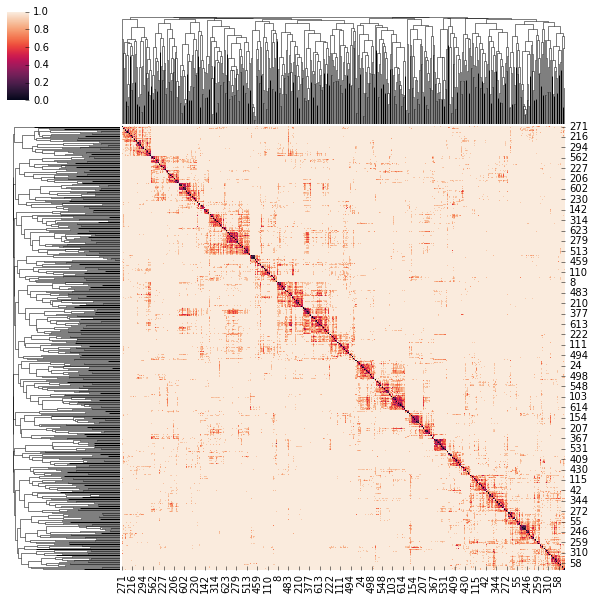

In [7]:
cluster_plot = sns.clustermap(1-thresholded_similarity_matrix, 
                              row_linkage = clustered_tree_UPMGA , 
                              col_linkage = clustered_tree_UPMGA)

The cluster_assignements variable contains the cluster assignement for each edge and can be used as appropriate to assign each edge to a cluster, for example for visualization purposes.

In [8]:
cluster_assignments_UPMGA

array([ 8,  8,  4, 12, 12, 13, 13, 12, 11, 13, 13, 13,  6, 12,  8,  8, 23,
        2,  2, 20,  2, 16, 16, 12, 15, 10, 18,  8,  8, 12,  8, 10,  7,  8,
       23, 24, 11, 10, 23,  8,  8, 19, 22, 20, 20, 22, 25,  5, 16, 25,  3,
       25, 23, 23, 23, 23, 23, 23, 25, 18,  6, 22, 22, 19, 22, 23, 10, 10,
        8, 10, 13,  8, 13,  6, 13, 16,  2,  8,  8,  8,  4,  4,  2, 18,  8,
       10,  6, 10,  6,  7, 22, 11,  8, 11,  2,  9, 14, 14, 11,  8, 18, 21,
       19, 16,  9,  9,  9,  9,  5, 10, 10, 13,  5, 17, 15, 22, 22, 15, 15,
       20, 20, 22, 22, 22, 22, 16, 16, 22, 22, 24, 23, 22,  8,  2, 20, 20,
       20,  2,  6, 10, 10, 18,  7,  8,  8,  8, 22, 13, 10, 25, 18, 22, 18,
       18, 18, 18, 22, 25, 18, 18, 18, 22, 21, 18, 22, 18, 15,  2,  5,  5,
       15, 15, 15, 13, 10,  8, 10,  2,  2,  2, 22, 22, 23, 23, 22, 25, 24,
       22, 16, 23, 25,  4, 18, 25, 22, 22,  8,  8,  8, 12, 11, 19, 19, 18,
       19, 19,  4, 18,  8,  8, 11, 11, 11,  5,  5,  5,  2,  2, 20, 16,  4,
        7, 13, 19, 25, 22

We can also visualize the edge similarity matrix with edges sorted by clusters of increasing sizes.

In [9]:
cluster_sizes_UPMGA, sorted_edge_matrix_UPMGA = sort_edges_by_cluster_size(cluster_assignments_UPMGA, thresholded_similarity_matrix)

For each edge cluster, the cluster_sizes_UPMGA array contains its initial rank-number, the number of edges it contains and its rank when parcels are sorted by increasing cluster size.

In [10]:
cluster_sizes_UPMGA

array([[ 1,  2,  0],
       [ 2, 41, 20],
       [ 3, 21, 10],
       [ 4, 19,  9],
       [ 5, 26, 13],
       [ 6, 11,  5],
       [ 7,  7,  2],
       [ 8, 59, 24],
       [ 9, 16,  7],
       [10, 23, 12],
       [11, 37, 18],
       [12, 38, 19],
       [13, 29, 15],
       [14,  9,  4],
       [15, 27, 14],
       [16, 45, 21],
       [17,  5,  1],
       [18, 37, 17],
       [19, 18,  8],
       [20, 21, 11],
       [21, 13,  6],
       [22, 54, 23],
       [23, 46, 22],
       [24,  7,  3],
       [25, 29, 16]], dtype=int64)

The sorted_edge_matrix is similar to thresholded_similarity_matrix but with its edges sorted by cluster.

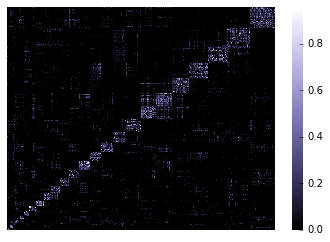

In [11]:
cmap =sns.cubehelix_palette(n_colors=50, start=0, rot=0, light=0, dark=1, as_cmap=True)
plt.figure(2)
plot = sns.heatmap(sorted_edge_matrix_UPMGA, cmap=cmap,
                   xticklabels= False,
                   yticklabels = False)
plot.invert_yaxis()

## Louvain community detection

We now use the same thresholded_similarity_matrix to cluster the edges using the Louvain community detection algorithm implemented in the community and networkx packages. 

Here the parameter is Louvain_resolution which affects the size and number of communities found. A higher resolution (smaller Louvain_resolution parameter) produces a higher number of smaller clusters). Louvain_resolution = 1 is the standard Louvain method.

In [12]:
Louvain_resolution = 0.45

out = cluster_edges_Louvain(edge_similarity_matrix = thresholded_similarity_matrix,
                            Louvain_resolution = Louvain_resolution)

community_assignment = out[0] 
dendogram_Louvain = out[1] 

community_assignment contains the cluster assignement for each edge and can be used as appropriate to assign each edge to a cluster, for example for visualization purposes.

In [13]:
cluster_sizes_Louvain, sorted_edge_matrix_Louvain = sort_edges_by_cluster_size(community_assignment,
                                                                thresholded_similarity_matrix)

cluster_sizes_Louvain

array([[ 1, 50, 11],
       [ 2, 50, 12],
       [ 3, 46, 10],
       [ 4, 30,  3],
       [ 5, 28,  2],
       [ 6, 34,  7],
       [ 7, 57, 14],
       [ 8, 41,  9],
       [ 9, 74, 15],
       [10, 31,  4],
       [11, 36,  8],
       [12, 33,  6],
       [13, 22,  0],
       [14, 52, 13],
       [15, 24,  1],
       [16, 32,  5]], dtype=int64)

We can here also visualize the edge similarity matrix with edges sorted by clusters of increasing sizes.

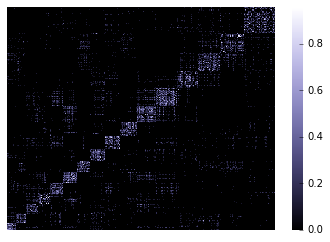

In [14]:
cmap =sns.cubehelix_palette(n_colors=50, start=0, rot=0, light=0, dark=1, as_cmap=True)
plt.figure(2)
plot = sns.heatmap(sorted_edge_matrix_Louvain, cmap=cmap,
                   xticklabels= False,
                   yticklabels = False)
plot.invert_yaxis()